<div style="text-align: left; background-color:#bcebf7; font-family:Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 32px">PROJECT: ANALYSE AND CLASSIFY THE AUTHENTICITY OF ONLINE NEWS IN BIG DATA CONTEXT</div>
<div style="text-align: left; background-color:#ee9ef7; font-family: Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px"> EXPLORATORY DATA ANALYSIS: GETTING INSIGHTS FROM DATA</div>

### 1. Import library

In [34]:
import pandas as pd
import numpy as np
import statistics
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Visualize.make_dataframe import make_dataframe, make_raw_dataframe
from Visualize.retrieve_topic import retrieve_topic
from Visualize.visualize_frequency_words import visualize_frequency_words

### 2. Get data from Mongodb and convert to dataframe

In [35]:
df = pd.DataFrame()
df = make_dataframe()
df.head(2)

,title,content,url,label,imageURL,domain,topic,date
0,Lập đội phản ứng nhanh chống dịch viêm phổi Vũ Hán,"[chính_phủ, lập, đội, phản_ứng, chống, dịch, viêm, đường, hô_hấp, viru, corona, ncov, chỉ_thị, thủ_tướng, 28, 1, đội, phản_ứng, chống, dịch, viêm, phổi, vũ, hán, phó, thủ_tướng, vũ, đức, đam, trưởng, ban, y_tế, đôn_đốc, hằng, báo_cáo, thủ_tướng, thủ_tướng, y_tế, hướng_dẫn, địa_phương, giám_sát, phát_hiện, trường_hợp, lây_nhiễm, cách_li, triệt_để, theo_dõi, tiếp, túc, nghi_ngờ, nhiễm_bệnh, chỉ_đạo, tỉnh, cửa_khẩu, đường_bộ, đường_thuỷ, sân_bay, quốc_tế, giám_sát, hành_khách, nhập_cảnh, đi, dịch, bệnh_viện, trung_ương, địa_phương, quân_đội, công_an, dã_chiến, lệnh, sẵn_sàng, hoàn_thiện, phương, ứng_phó, tiếp_nhận, bệnh_nhân, cần_thiết, khử_trùng, tẩi, độc, cửa_khẩu, nước_ngoài, làm_việc, cảng, vũng, thị_xã, kỳ, hà_tĩnh, đo, thân_nhiệt, nhập_cảnh, ảnh, cdc, ngành, y_tế, thông_tin, diễn_biến_dịch_bệnh, khuyến_cáo, biện_pháp, phòng_bệnh, ...]",https://vnexpress.net/lap-doi-phan-ung-nhanh-chong-dich-viem-phoi-vu-han-4047404.html,0,https://i2-vnexpress.vnecdn.net/2020/01/28/kiemtrathannhiet81381580129-15-2759-5191-1580221532.jpg?w=1200&h=0&q=100&dpr=1&fit=crop&s=d3_SSZkC5lBrDgngQBt80Q,vnexpress.net,Thời sự,2020-01-28
1,Kẹt xe gần 10 km hai bên cầu Rạch Miễu,"[bến, trex, mái, ôtô, trở_lại, tp, hcm, đông, tai_nạn, chết, khu_vực, cầu, rạch, miễu, kẹt, xe_kéo_dài, 10, km, kẹt, xe, 10, km, hai, cầu, rạch, miễu, cảnh, kẹt, xe, đầu, cầu, rạch, miễu, video, hoàng, nam, chiều, 28, 1, mùng, 4, tết, dòng, tỉnh, miền, tâi, trở_lại, tp, hcm, sáu, nghỉ, tết, nguyên, đán, đột_biến, hàng, trăm, cảnh_sát, giao_thông, cơ_động, bố_trí, khu_vực, nút, giao, chặn, xe, đợt, ùn, ứ, khu_vực, chân, cầu, rạch, miễu, 15h, ôtô, 29, chỗ, bến, tre, đi, tp, hcm, xe, chại, trạm, thu, phí, bot, cầu, rạch, miễu, 200, m, xải, va_chạm, xe_mái, băng, ngang, đường, ...]",https://vnexpress.net/ket-xe-gan-10-km-hai-ben-cau-rach-mieu-4047389.html,0,https://i2-vnexpress.vnecdn.net/2020/01/28/ketxe-1580216863-3434-1580217000.jpg?w=1200&h=0&q=100&dpr=1&fit=crop&s=7GbVAniKRSPBwpfITUiUJA,vnexpress.net,Thời sự,2020-01-28


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9091 non-null   object
 1   content   9091 non-null   object
 2   url       9091 non-null   object
 3   label     9091 non-null   int64 
 4   imageURL  9091 non-null   object
 5   domain    9091 non-null   object
 6   topic     8849 non-null   object
 7   date      9078 non-null   object
dtypes: int64(1), object(7)
memory usage: 568.3+ KB


### 3. Get brief information

3.1 Data shape and features

In [37]:
print("Data shape:",df.shape)
print("Data features:", df.columns.tolist())

Data shape: (9091, 8)
Data features: ['title', 'content', 'url', 'label', 'imageURL', 'domain', 'topic', 'date']


3.2 Distribution of classes

In [38]:
df['label'].value_counts()

0    6251
1    2840
Name: label, dtype: int64

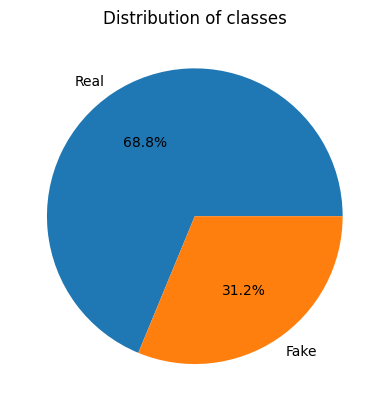

In [39]:
count = [df['label'].value_counts()[0], df['label'].value_counts()[1]]
labels = ['Real', 'Fake']
plt.pie(count, labels = labels, autopct='%1.1f%%');
plt.title('Distribution of classes');

3.3 Distribution of topics

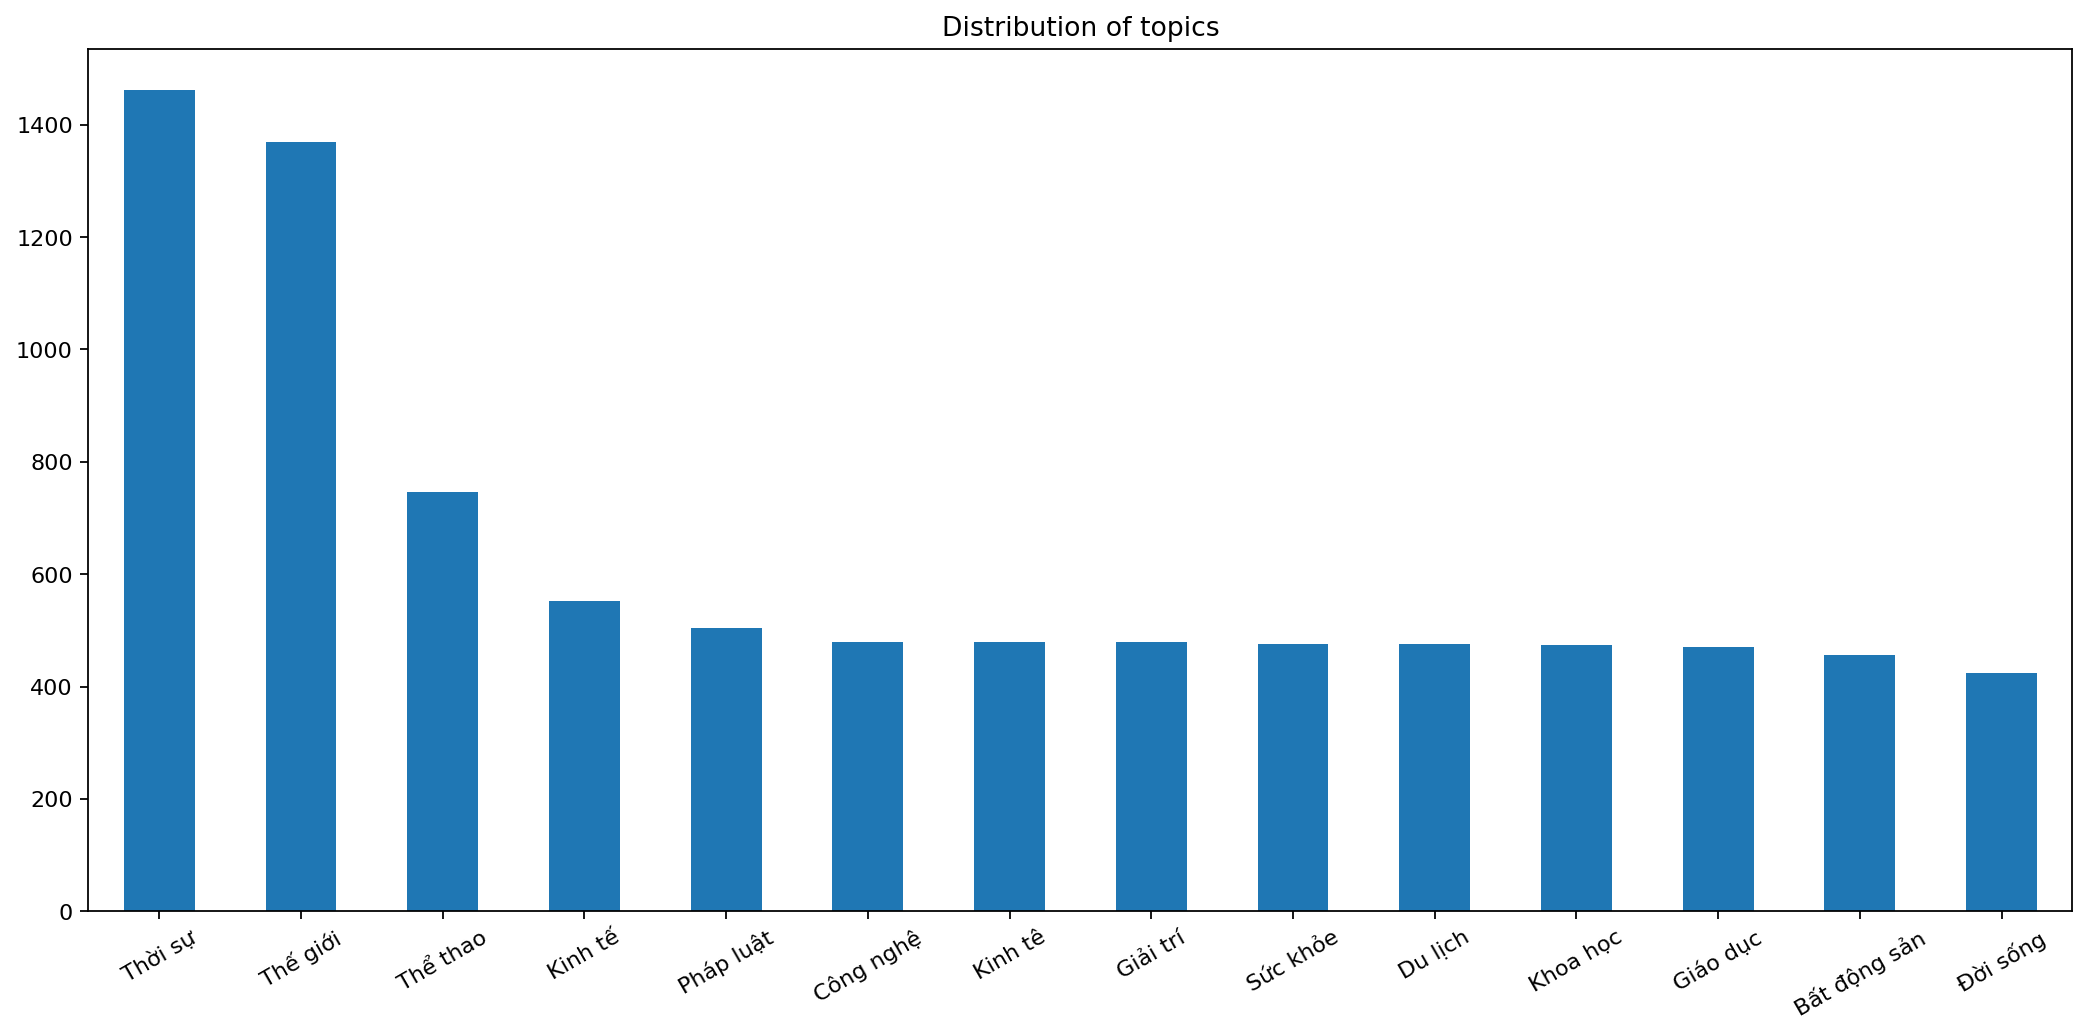

In [40]:
plt.figure(figsize = (16,7), dpi = 160)
df['topic'].value_counts().plot(kind = 'bar');
plt.xticks(rotation = 30, horizontalalignment = 'center')
plt.title('Distribution of topics');

### 4. Text analysis

In [41]:
from utils import *

4.1 Statistical information of text length

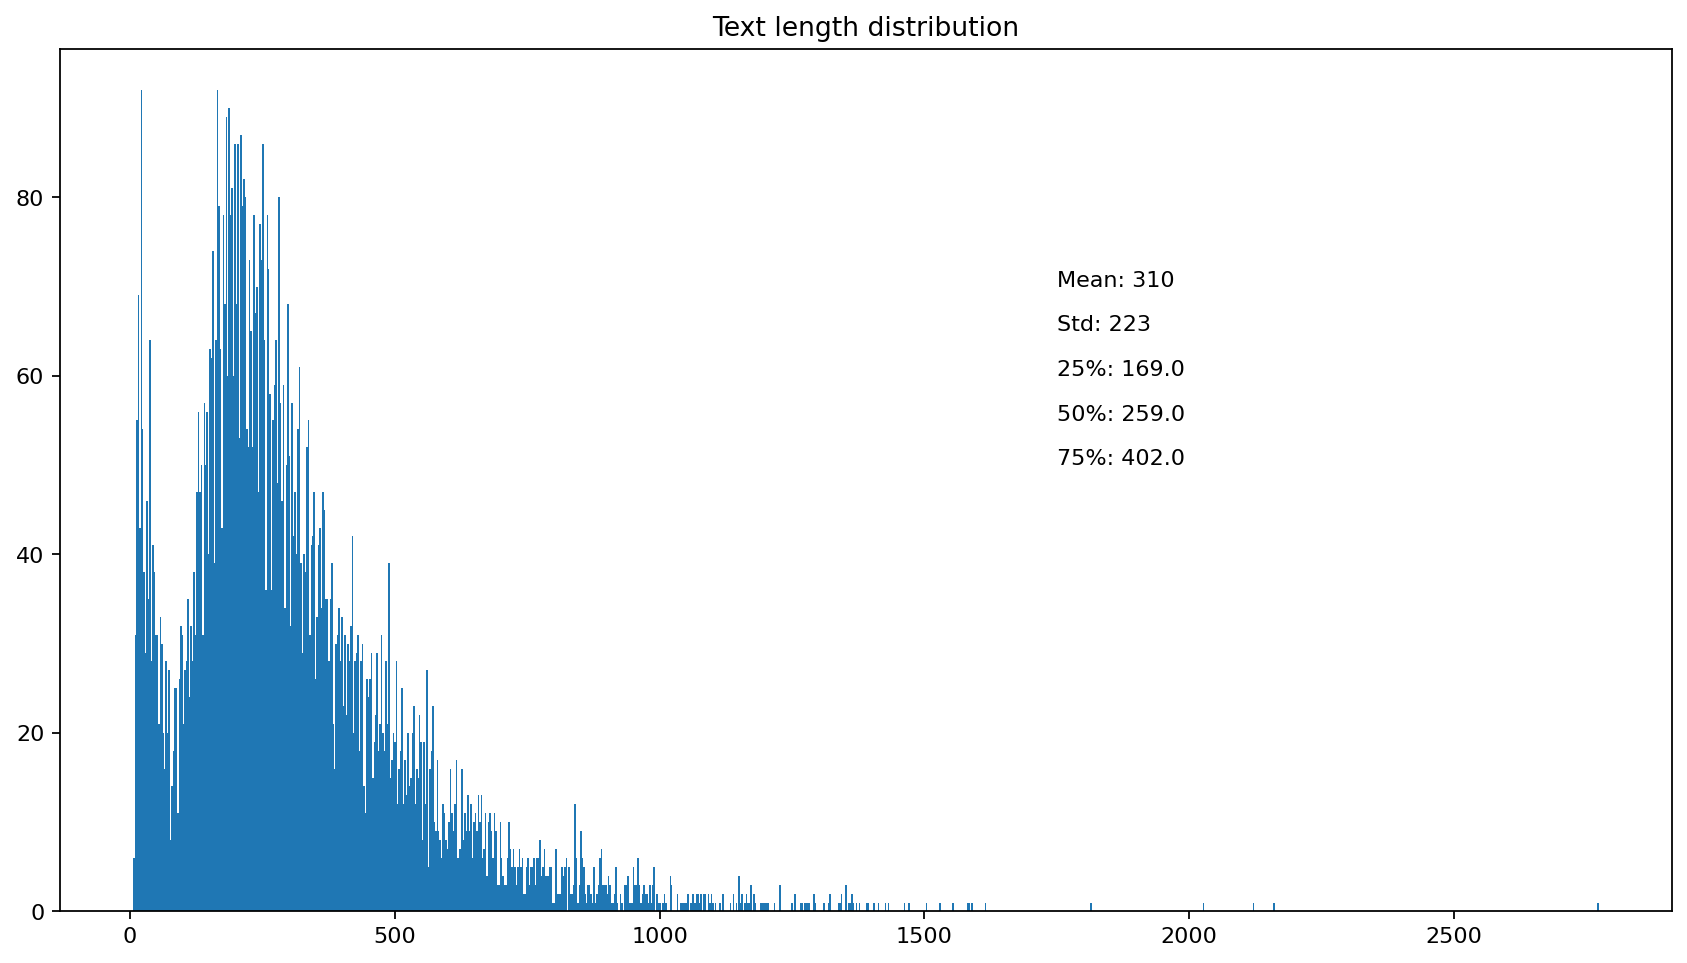

In [42]:
#doc_lens = [get_len(d) for d in df.content]
doc_lens = [len(d) for d in df.content]
plt.figure(figsize=(13,7), dpi=160)
plt.locator_params(axis='x', nbins = 10)
plt.text(1750, 70, f'Mean: {round(statistics.mean(doc_lens))}')
plt.text(1750, 65, f'Std: {round(statistics.stdev(doc_lens))}')
plt.text(1750, 60, f'25%: {(statistics.quantiles(doc_lens)[0])}')
plt.text(1750, 55, f'50%: {(statistics.quantiles(doc_lens)[1])}')
plt.text(1750, 50, f'75%: {(statistics.quantiles(doc_lens)[2])}')
plt.hist(doc_lens, bins = 1000);
plt.title("Text length distribution");

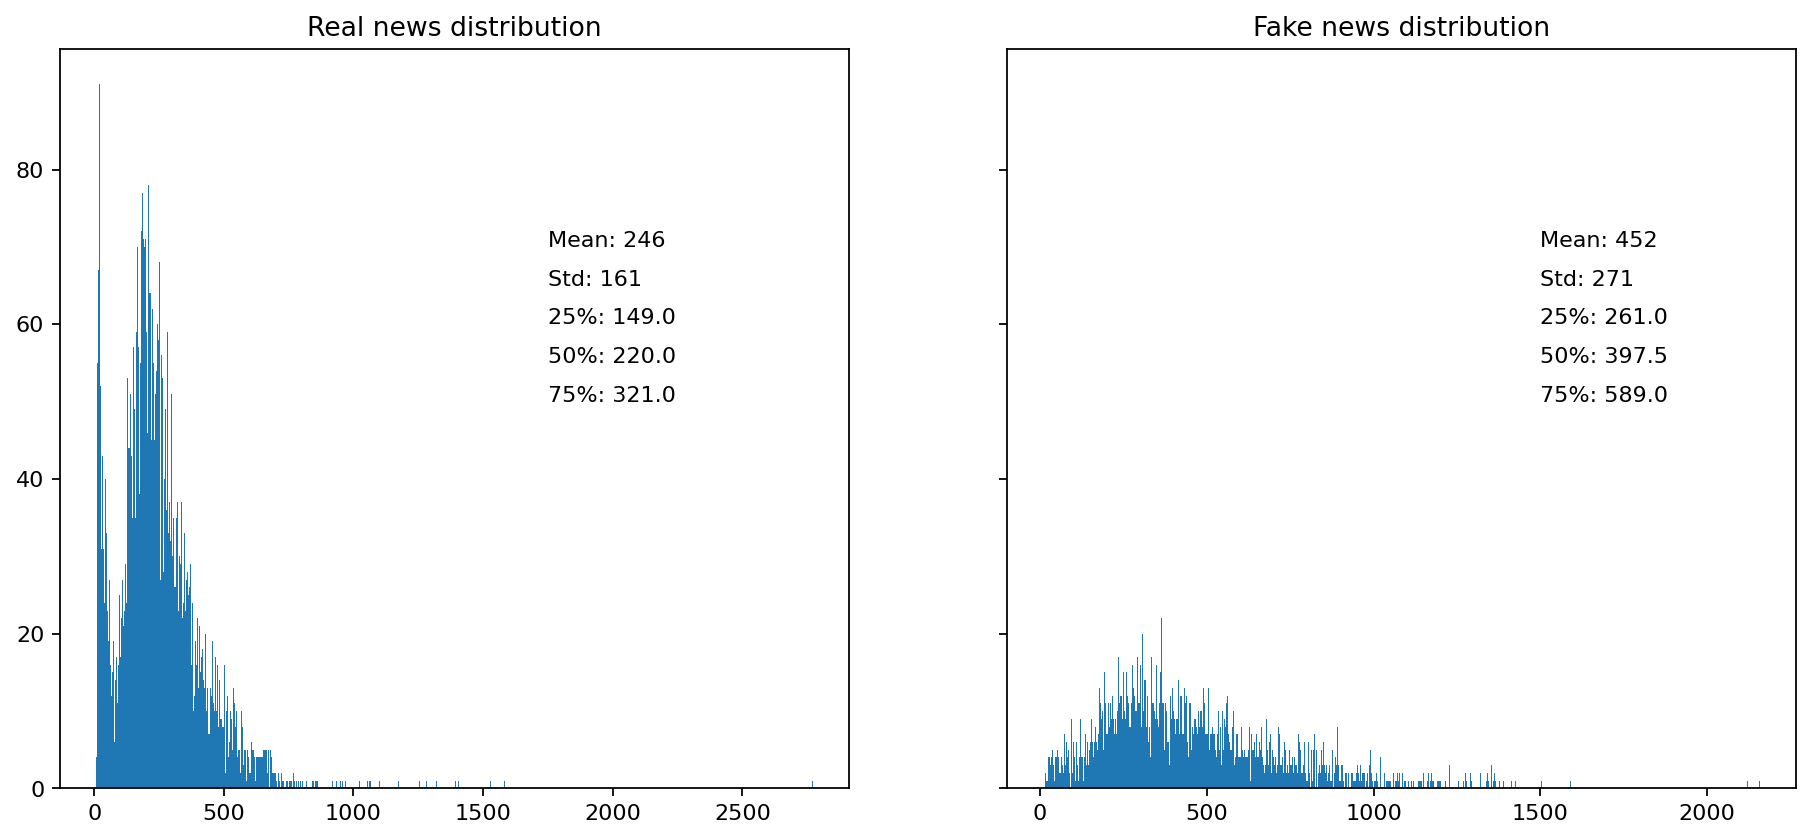

In [43]:
fake_df = df[df['label'] == 1]
real_df = df[df['label'] == 0]
fake_doc_lens = [len(d) for d in fake_df.content]
real_doc_lens = [len(d) for d in real_df.content]

fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi=160, sharey = True)

axes[0].text(1750, 70, f'Mean: {round(statistics.mean(real_doc_lens))}')
axes[0].text(1750, 65, f'Std: {round(statistics.stdev(real_doc_lens))}')
axes[0].text(1750, 60, f'25%: {(statistics.quantiles(real_doc_lens)[0])}')
axes[0].text(1750, 55, f'50%: {(statistics.quantiles(real_doc_lens)[1])}')
axes[0].text(1750, 50, f'75%: {(statistics.quantiles(real_doc_lens)[2])}')
axes[0].hist(real_doc_lens, bins = 1000);
axes[0].set_title("Real news distribution");

axes[1].text(1500, 70, f'Mean: {round(statistics.mean(fake_doc_lens))}')
axes[1].text(1500, 65, f'Std: {round(statistics.stdev(fake_doc_lens))}')
axes[1].text(1500, 60, f'25%: {(statistics.quantiles(fake_doc_lens)[0])}')
axes[1].text(1500, 55, f'50%: {(statistics.quantiles(fake_doc_lens)[1])}')
axes[1].text(1500, 50, f'75%: {(statistics.quantiles(fake_doc_lens)[2])}')
axes[1].hist(fake_doc_lens, bins = 1000);
axes[1].set_title("Fake news distribution");

4.2 Statistical information of Lexical Diversity


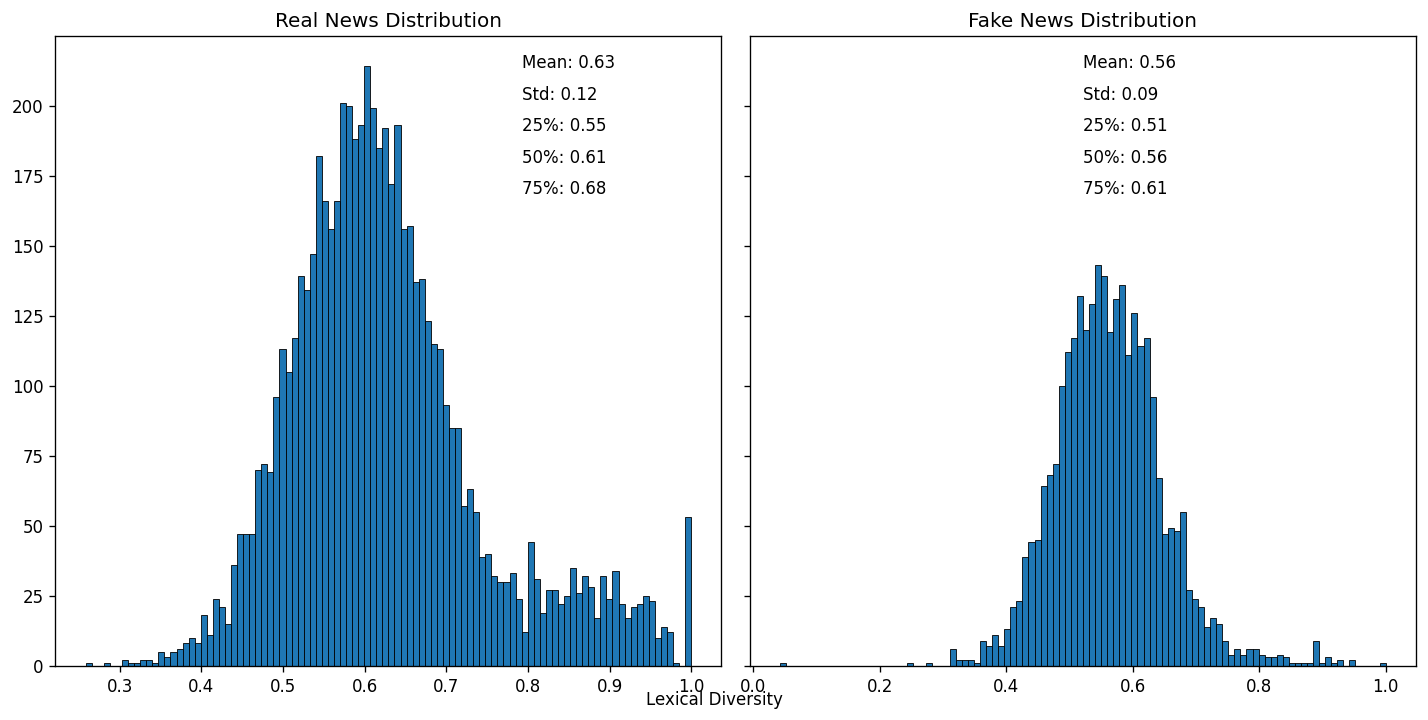

In [71]:

# Calculate lexical diversity
fake_doc_lexical_diversity = [cal_TypeTokenRatio(d) for d in fake_df.content]
read_doc_lexical_diversity = [cal_TypeTokenRatio(d) for d in real_df.content]

# Create subplots with a reasonable size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=120, sharey=True)

# Real news distribution subplot
axes[0].text(0.7, 0.95, f'Mean: {round(statistics.mean(read_doc_lexical_diversity), 2)}', transform=axes[0].transAxes)
axes[0].text(0.7, 0.90, f'Std: {round(statistics.stdev(read_doc_lexical_diversity), 2)}', transform=axes[0].transAxes)
axes[0].text(0.7, 0.85, f'25%: {round(statistics.quantiles(read_doc_lexical_diversity)[0], 2)}', transform=axes[0].transAxes)
axes[0].text(0.7, 0.80, f'50%: {round(statistics.quantiles(read_doc_lexical_diversity)[1], 2)}', transform=axes[0].transAxes)
axes[0].text(0.7, 0.75, f'75%: {round(statistics.quantiles(read_doc_lexical_diversity)[2], 2)}', transform=axes[0].transAxes)
axes[0].hist(read_doc_lexical_diversity, bins=100, edgecolor='black', linewidth=0.5)
axes[0].set_title("Real News Distribution")

# Fake news distribution subplot
axes[1].text(0.5, 0.95, f'Mean: {round(statistics.mean(fake_doc_lexical_diversity), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.90, f'Std: {round(statistics.stdev(fake_doc_lexical_diversity), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.85, f'25%: {round(statistics.quantiles(fake_doc_lexical_diversity)[0], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.80, f'50%: {round(statistics.quantiles(fake_doc_lexical_diversity)[1], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.75, f'75%: {round(statistics.quantiles(fake_doc_lexical_diversity)[2], 2)}', transform=axes[1].transAxes)
axes[1].hist(fake_doc_lexical_diversity, bins=100, edgecolor='black', linewidth=0.5)
axes[1].set_title("Fake News Distribution")

# Set common y-axis label
fig.text(0.5, 0.02, 'Lexical Diversity', ha='center', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


4.3 Word Frequency

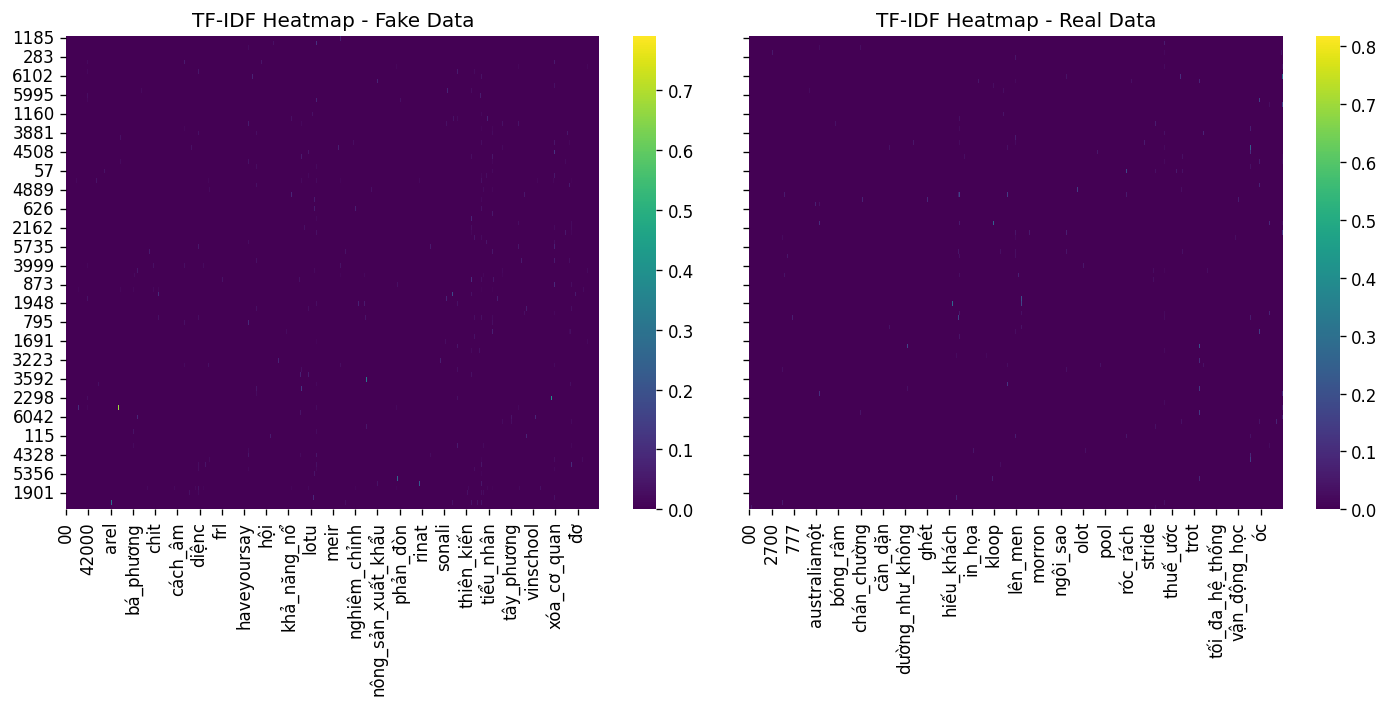

In [45]:
# Calculate TF-IDF matrix using the provided function
tfidf_df1 = calculate_tfidf(fake_df.content)
tfidf_df2 = calculate_tfidf(real_df.content)  # Call the function again with another set of documents

# Create subplots with a reasonable size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=120, sharey=True)

# Visualize TF-IDF matrix for the first set of documents
visualize_tfidf(tfidf_df1, axes[0], 'TF-IDF Heatmap - Fake Data')

# Visualize TF-IDF matrix for the second set of documents
visualize_tfidf(tfidf_df2, axes[1], 'TF-IDF Heatmap - Real Data')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


4.4 Statistical information of Readability


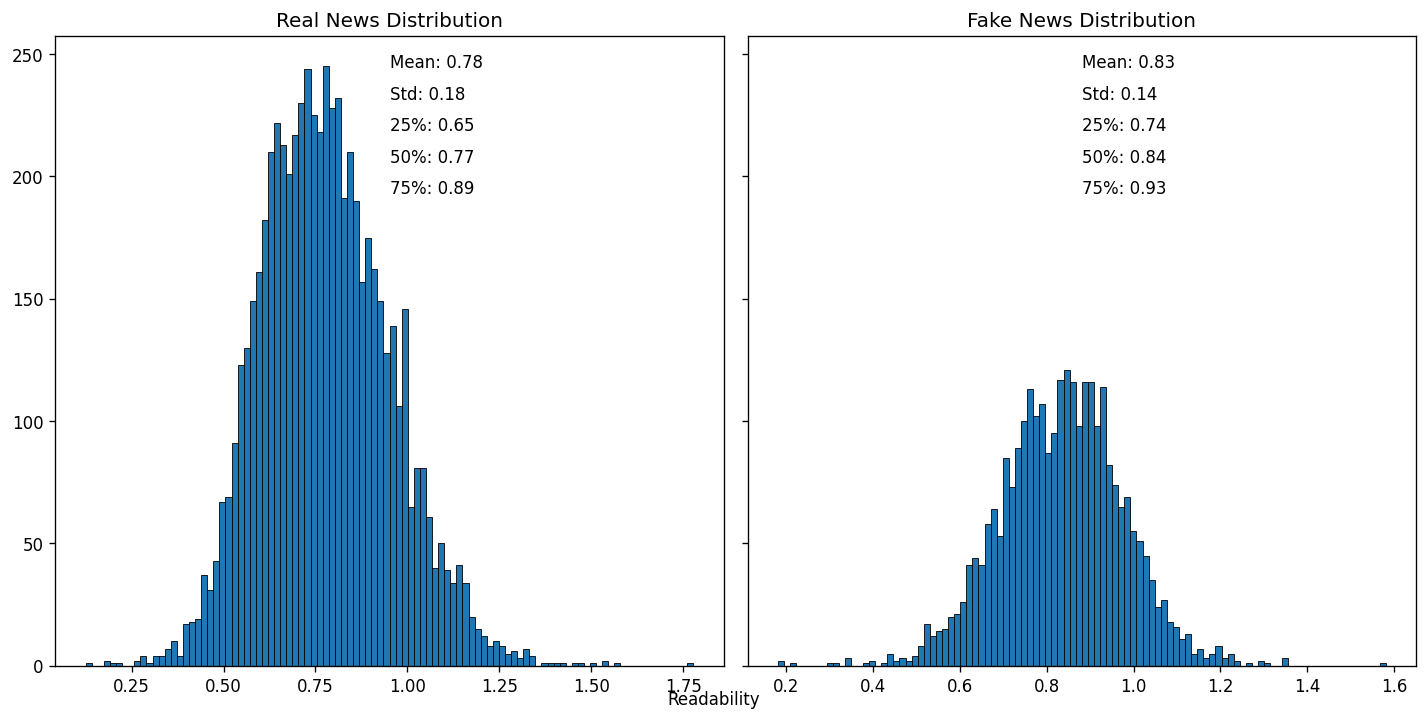

In [46]:
# Calculate readability
fake_doc_readability = [cal_readability(d) for d in fake_df.content]
read_doc_readability = [cal_readability(d) for d in real_df.content]

# Create subplots with a reasonable size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=120, sharey=True)

# Real news distribution subplot
axes[0].text(0.5, 0.95, f'Mean: {round(statistics.mean(read_doc_readability), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.90, f'Std: {round(statistics.stdev(read_doc_readability), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.85, f'25%: {round(statistics.quantiles(read_doc_readability)[0], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.80, f'50%: {round(statistics.quantiles(read_doc_readability)[1], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.75, f'75%: {round(statistics.quantiles(read_doc_readability)[2], 2)}', transform=axes[0].transAxes)
axes[0].hist(read_doc_readability, bins=100, edgecolor='black', linewidth=0.5)
axes[0].set_title("Real News Distribution")

# Fake news distribution subplot
axes[1].text(0.5, 0.95, f'Mean: {round(statistics.mean(fake_doc_readability), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.90, f'Std: {round(statistics.stdev(fake_doc_readability), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.85, f'25%: {round(statistics.quantiles(fake_doc_readability)[0], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.80, f'50%: {round(statistics.quantiles(fake_doc_readability)[1], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.75, f'75%: {round(statistics.quantiles(fake_doc_readability)[2], 2)}', transform=axes[1].transAxes)
axes[1].hist(fake_doc_readability, bins=100, edgecolor='black', linewidth=0.5)
axes[1].set_title("Fake News Distribution")

# Set common y-axis label
fig.text(0.5, 0.02, 'Readability', ha='center', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


4.5 Statistical information of Syntactic Complexity

In [47]:
df_raw = pd.DataFrame()
df_raw = make_raw_dataframe()

fake_raw_df = df_raw[df_raw['label'] == 1]
real_raw_df = df_raw[df_raw['label'] == 0]

In [48]:
fake_doc_syntactic_complexity = [cal_syntactic_complexity(d) for d in fake_raw_df.content if d]
real_doc_syntatic_complexity = [cal_syntactic_complexity(d) for d in real_raw_df.content if d]


4.5.1 Average Sentence Length

In [49]:

fake_doc_syntactic_complexity_avg_sent_len = [d['average_sentence_length'] for d in fake_doc_syntactic_complexity]
real_doc_syntatic_complexity_avg_sent_len = [d['average_sentence_length'] for d in real_doc_syntatic_complexity]

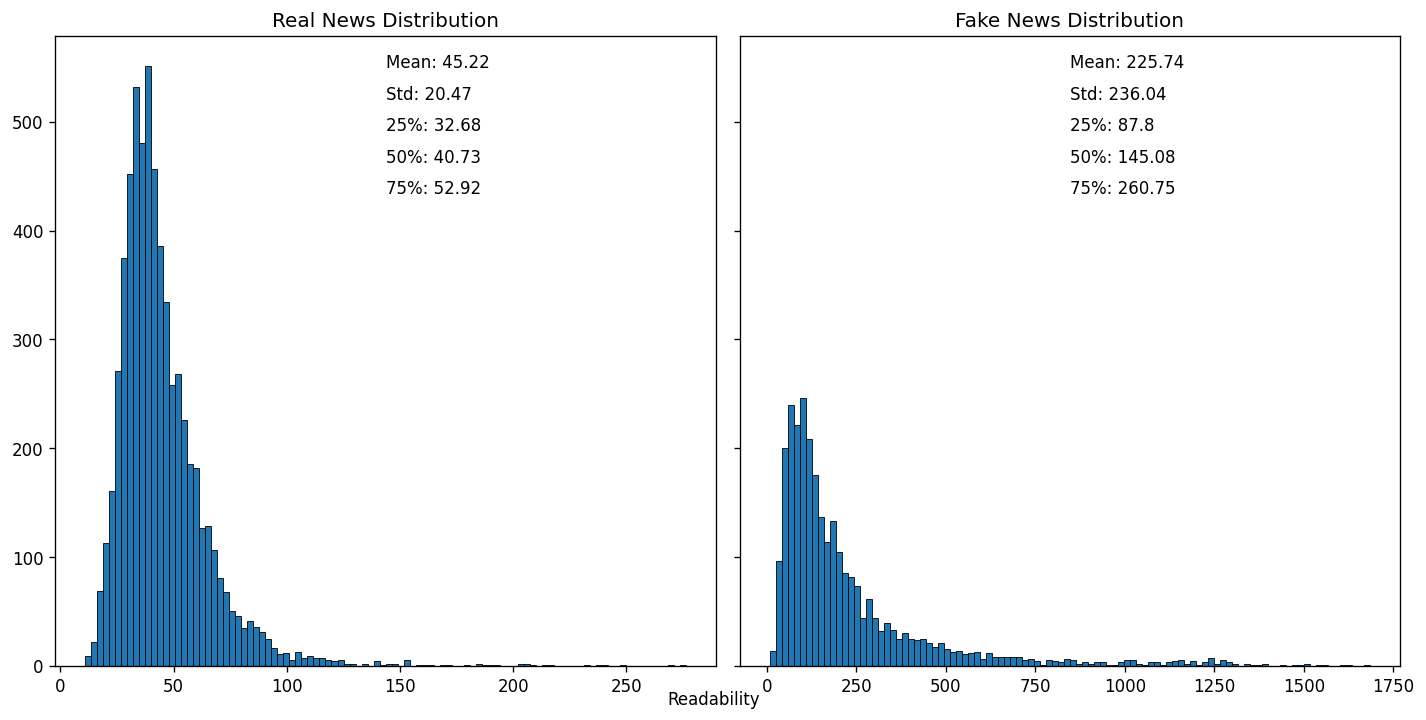

In [50]:
# Create subplots with a reasonable size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=120, sharey=True)

# Real news distribution subplot
axes[0].text(0.5, 0.95, f'Mean: {round(statistics.mean(real_doc_syntatic_complexity_avg_sent_len), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.90, f'Std: {round(statistics.stdev(real_doc_syntatic_complexity_avg_sent_len), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.85, f'25%: {round(statistics.quantiles(real_doc_syntatic_complexity_avg_sent_len)[0], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.80, f'50%: {round(statistics.quantiles(real_doc_syntatic_complexity_avg_sent_len)[1], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.75, f'75%: {round(statistics.quantiles(real_doc_syntatic_complexity_avg_sent_len)[2], 2)}', transform=axes[0].transAxes)
axes[0].hist(real_doc_syntatic_complexity_avg_sent_len, bins=100, edgecolor='black', linewidth=0.5)
axes[0].set_title("Real News Distribution")

# Fake news distribution subplot
axes[1].text(0.5, 0.95, f'Mean: {round(statistics.mean(fake_doc_syntactic_complexity_avg_sent_len), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.90, f'Std: {round(statistics.stdev(fake_doc_syntactic_complexity_avg_sent_len), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.85, f'25%: {round(statistics.quantiles(fake_doc_syntactic_complexity_avg_sent_len)[0], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.80, f'50%: {round(statistics.quantiles(fake_doc_syntactic_complexity_avg_sent_len)[1], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.75, f'75%: {round(statistics.quantiles(fake_doc_syntactic_complexity_avg_sent_len)[2], 2)}', transform=axes[1].transAxes)
axes[1].hist(fake_doc_syntactic_complexity_avg_sent_len, bins=100, edgecolor='black', linewidth=0.5)
axes[1].set_title("Fake News Distribution")

# Set common y-axis label
fig.text(0.5, 0.02, 'Readability', ha='center', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


4.5.2 Average Clause Length

In [51]:

fake_doc_avg_clause_len= [d['average_clause_length'] for d in fake_doc_syntactic_complexity]
real_doc_avg_clause_len = [d['average_clause_length'] for d in real_doc_syntatic_complexity]

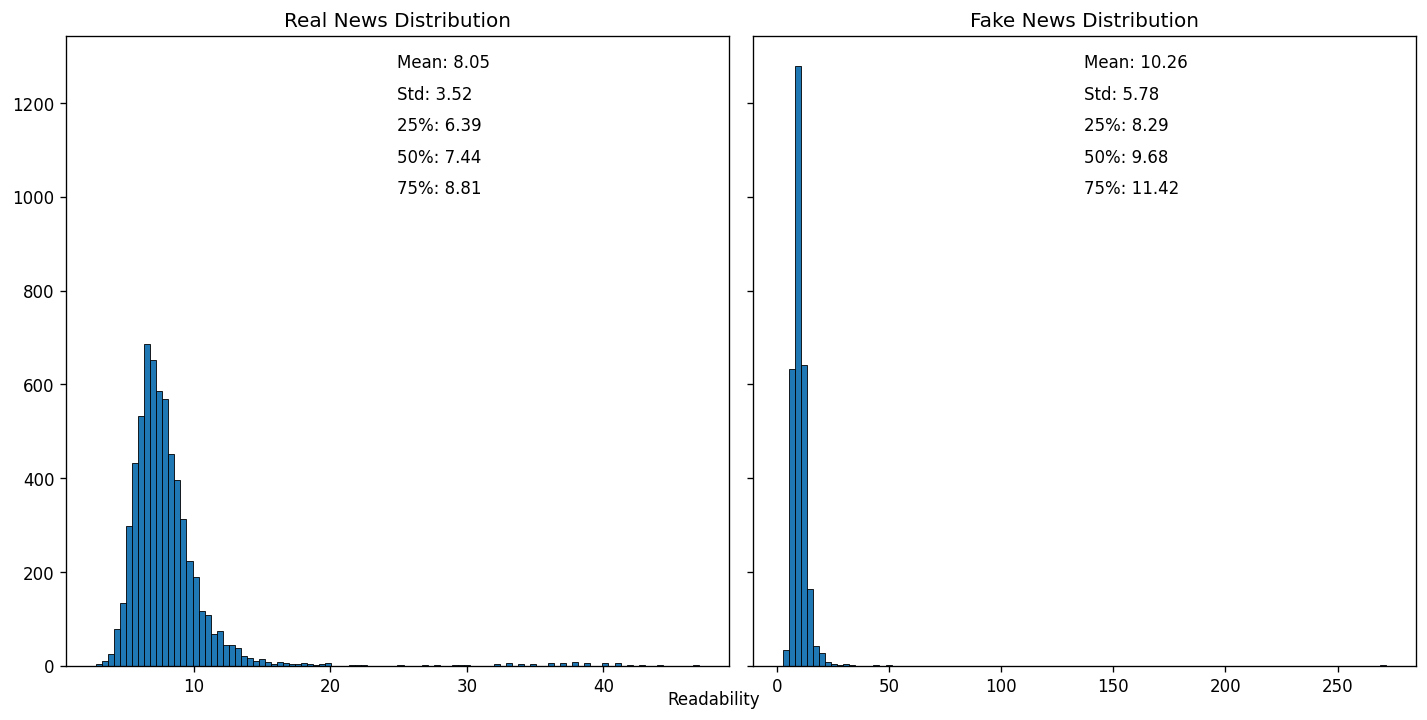

In [59]:
# Create subplots with a reasonable size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=120, sharey=True)

# Real news distribution subplot
axes[0].text(0.5, 0.95, f'Mean: {round(statistics.mean(real_doc_avg_clause_len), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.90, f'Std: {round(statistics.stdev(real_doc_avg_clause_len), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.85, f'25%: {round(statistics.quantiles(real_doc_avg_clause_len)[0], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.80, f'50%: {round(statistics.quantiles(real_doc_avg_clause_len)[1], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.75, f'75%: {round(statistics.quantiles(real_doc_avg_clause_len)[2], 2)}', transform=axes[0].transAxes)
axes[0].hist(real_doc_avg_clause_len, bins=100, edgecolor='black', linewidth=0.5)
axes[0].set_title("Real News Distribution")

# Fake news distribution subplot
axes[1].text(0.5, 0.95, f'Mean: {round(statistics.mean(fake_doc_avg_clause_len), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.90, f'Std: {round(statistics.stdev(fake_doc_avg_clause_len), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.85, f'25%: {round(statistics.quantiles(fake_doc_avg_clause_len)[0], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.80, f'50%: {round(statistics.quantiles(fake_doc_avg_clause_len)[1], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.75, f'75%: {round(statistics.quantiles(fake_doc_avg_clause_len)[2], 2)}', transform=axes[1].transAxes)
axes[1].hist(fake_doc_avg_clause_len, bins=100, edgecolor='black', linewidth=0.5)
axes[1].set_title("Fake News Distribution")

# Set common y-axis label
fig.text(0.5, 0.02, 'Readability', ha='center', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


4.5.3 Unique syntactic Structures

In [66]:

fake_doc_unique_syntactic_structures= [d['unique_syntactic_structures'] for d in fake_doc_syntactic_complexity]
real_doc_unique_syntactic_structures = [d['unique_syntactic_structures'] for d in real_doc_syntatic_complexity]

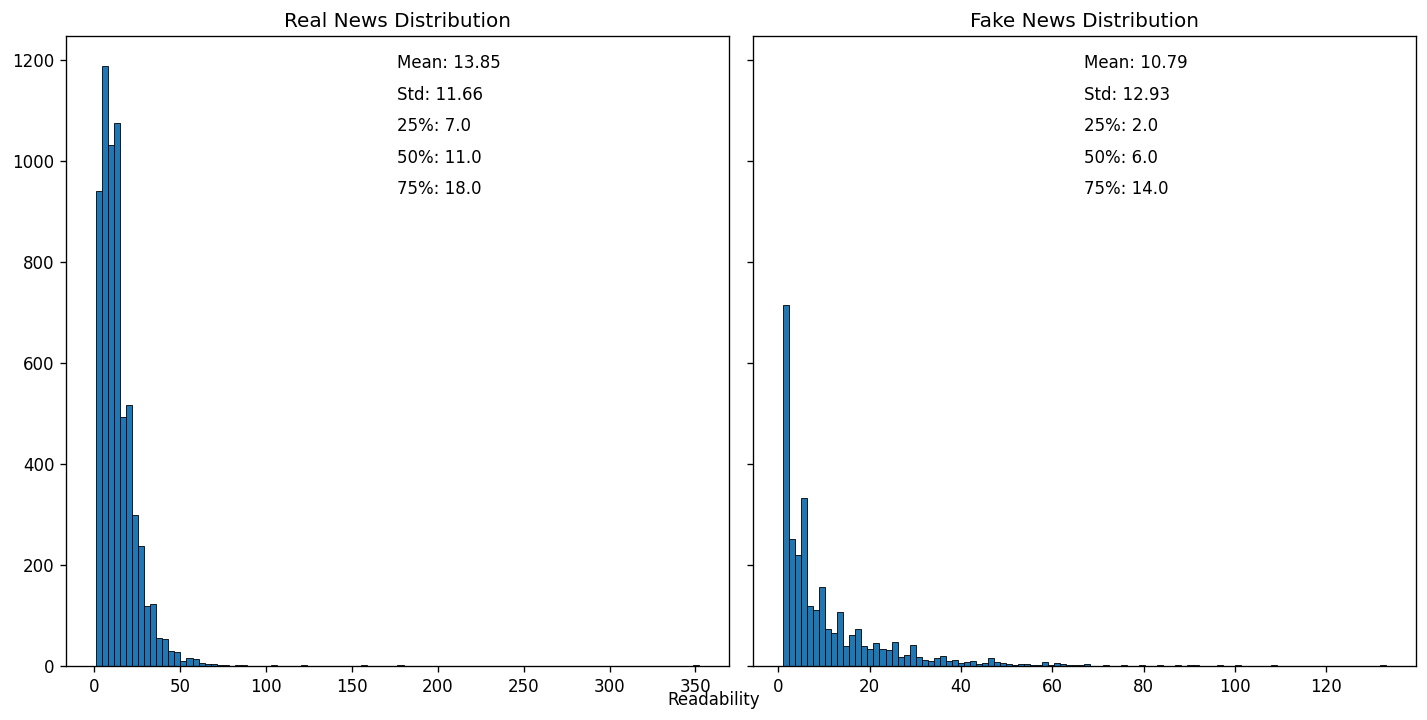

In [67]:
# Create subplots with a reasonable size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=120, sharey=True)

# Real news distribution subplot
axes[0].text(0.5, 0.95, f'Mean: {round(statistics.mean(real_doc_unique_syntactic_structures), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.90, f'Std: {round(statistics.stdev(real_doc_unique_syntactic_structures), 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.85, f'25%: {round(statistics.quantiles(real_doc_unique_syntactic_structures)[0], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.80, f'50%: {round(statistics.quantiles(real_doc_unique_syntactic_structures)[1], 2)}', transform=axes[0].transAxes)
axes[0].text(0.5, 0.75, f'75%: {round(statistics.quantiles(real_doc_unique_syntactic_structures)[2], 2)}', transform=axes[0].transAxes)
axes[0].hist(real_doc_unique_syntactic_structures, bins=100, edgecolor='black', linewidth=0.5)
axes[0].set_title("Real News Distribution")

# Fake news distribution subplot
axes[1].text(0.5, 0.95, f'Mean: {round(statistics.mean(fake_doc_unique_syntactic_structures), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.90, f'Std: {round(statistics.stdev(fake_doc_unique_syntactic_structures), 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.85, f'25%: {round(statistics.quantiles(fake_doc_unique_syntactic_structures)[0], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.80, f'50%: {round(statistics.quantiles(fake_doc_unique_syntactic_structures)[1], 2)}', transform=axes[1].transAxes)
axes[1].text(0.5, 0.75, f'75%: {round(statistics.quantiles(fake_doc_unique_syntactic_structures)[2], 2)}', transform=axes[1].transAxes)
axes[1].hist(fake_doc_unique_syntactic_structures, bins=100, edgecolor='black', linewidth=0.5)
axes[1].set_title("Fake News Distribution")

# Set common y-axis label
fig.text(0.5, 0.02, 'Readability', ha='center', va='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### 5. Use topic extraction to find out news trends according to each topic in the collected dataset

5.1 Topic extraction for each news

In [68]:
df['topic_extract'] = pd.Series()
for i in range(df.shape[0]):
    df['topic_extract'][i] = retrieve_topic(df['content'][i])

In [69]:
pd.set_option('display.max_colwidth', None)
df['topic_extract']

0               [dịch, y_tế, nhiễm, việt_nam, trường_hợp, ncov, vũ, thủ_tướng, phổi, địa_phương]
1                                              [cầu, xe, rạch, miễu, kẹt, ôtô, bến, km, tre, tp]
2       [giao_thông, liên_tục, cơ_quan, an_toàn, vi_phạm, bờ, du_khách, gọi, nhắc_nhở, trang_bị]
3                                      [m, sân, tung_hô, trò, múa, quần_đùi, quan, 6, đám, rước]
4                                    [lúa, nhựt, ha, tím, nông_dân, đồng, hai, gạo, đất, hữu_cơ]
                                                  ...                                           
9086                              [đá, pháp, cầu, nam, hình_ảnh, đi, việt, việt_nam, trang, đội]
9087                 [thuyền_buồm, clipper, đua, vịnh, việt, race, hạ_long, đoàn, nam, thủy_thủ]
9088         [đi, 10000, nghiên_cứu, con_số, mục_tiêu, hình_ảnh, sức_khỏe, đếm, phụ_nữ, lợi_ích]
9089             [đội, chelsea, bóng, hình_ảnh, trận, giải, lampard, huấn_luyện_viên, hai, unit]
9090          [bản_quyền, vtv,

5.2 With each type of real or fake topic, visualize their news trends

In [70]:
# general_topic = list(df.topic.unique())
# general_topic.remove(None)
# plt.rcParams['figure.figsize'] = [12, 7]
# grouped_df = df.groupby(['topic'])
# for t in general_topic:
#     tmp = grouped_df.get_group(t)
#     tmp_official = tmp[tmp['label'] == 0]
#     tmp_unofficial = tmp[tmp['label'] == 1]
#     plt.subplot(1, 2, 1)
#     visualize_frequency_words(tmp_official, 'topic_extract', f'News trend on official {t}')
#     plt.subplot(1, 2, 2)
#     visualize_frequency_words(tmp_unofficial, 'topic_extract', f'News trend on unoffical {t}')
#     plt.show()